In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Load and preprocess images
def load_and_preprocess_images(img_folder, img_size=(224, 224)):
    img_list = []
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        img_list.append(img_array)
    return np.vstack(img_list)

In [38]:
# Load actor images
actor_images = load_and_preprocess_images('D:\\Programming\\Project\\dataset_3\\amitabh_bachchan')

In [39]:
# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False)

In [40]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (actor or not)
model = Model(inputs=base_model.input, outputs=predictions)

In [41]:
# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# Create data generator
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow(actor_images, np.ones(len(actor_images)), batch_size=32)

In [44]:
# Train the model
model.fit(train_generator, epochs=10)

Epoch 1/10


c:\Users\NAMAGIRI TEJASRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8812 - loss: 0.2213
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 4.5164e-11
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 5.2826e-18
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 2.7847e-22
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 6.5383e-24
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 1.0413e-23
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 1.9492e-25
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 4.7740e-29
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 9.8166e-31
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 2.7734e-27


In [46]:
# Extract features
feature_model = Model(inputs=model.input, outputs=model.get_layer('dense_7').output)  # Adjust layer name
actor_features = feature_model.predict(actor_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


In [47]:
# Load and preprocess test images
test_images = load_and_preprocess_images('D:\\Programming\\Project\\dataset_3\\akshay_kumar')

In [48]:
# Extract test features
test_features = feature_model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


In [49]:
# Calculate cosine similarity
similarities = cosine_similarity(test_features, actor_features)
average_similarities = np.mean(similarities, axis=1)

In [50]:
# Find top 3 matches
top_3_indices = np.argsort(average_similarities)[-3:][::-1]
top_3_similarities = average_similarities[top_3_indices]

In [51]:
# Print top 3 matches and their probabilities
for i in range(3):
    print(f"Match {i+1}: Image index {top_3_indices[i]}, Similarity: {top_3_similarities[i]}")

Match 1: Image index 34, Similarity: 0.8849729895591736
Match 2: Image index 43, Similarity: 0.8840192556381226
Match 3: Image index 22, Similarity: 0.8834342956542969


In [55]:
# Optional: Display the top 3 matching images
import matplotlib.pyplot as plt

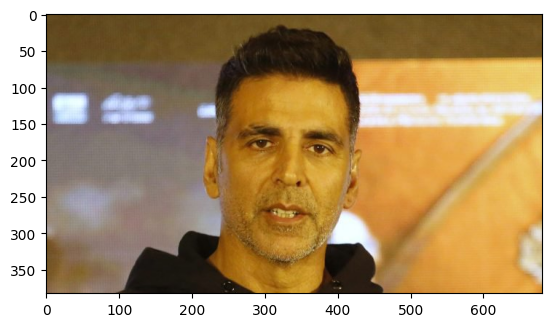

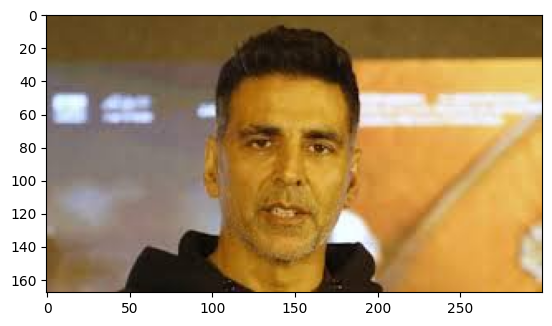

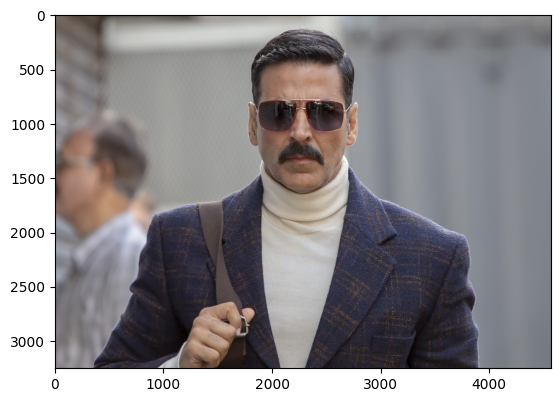

In [57]:
for idx in top_3_indices:
    img_path = os.path.join('D:\\Programming\\Project\\dataset_3\\akshay_kumar', os.listdir('D:\\Programming\\Project\\dataset_3\\akshay_kumar')[idx])
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()